KNN

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8652452025586352

 Train Accuracy: 1.0000
 Test Accuracy : 0.8722

 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345


 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       294
           1       0.84      0.92      0.88       293

    accuracy                           0.87       587
   macro avg       0.88      0.87      0.87       587
weighted avg       0.88      0.87      0.87       587



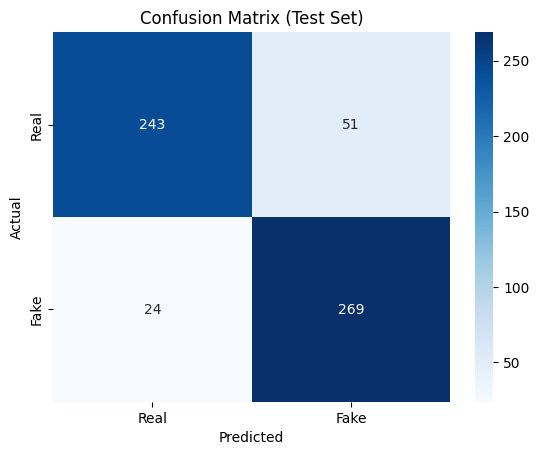

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Load balanced dataset
df = pd.read_excel('/content/telugu_indicbert_balanced.xlsx')

#  Split into features and labels
X = df.iloc[:, :-2]  # Assuming last 2 columns are 'label' and 'comment'
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Define KNN model and hyperparameter grid
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

#  Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

#  Evaluate on train and test sets
best_knn = grid.best_estimator_

# Train evaluation
y_train_pred = best_knn.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test evaluation
y_test_pred = best_knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 8. Confusion Matrix (Test Set)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()


RF

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9006396588486141

✅ Train Accuracy: 0.9996
✅ Test Accuracy : 0.8773

📘 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345


📗 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       294
           1       0.87      0.89      0.88       293

    accuracy                           0.88       587
   macro avg       0.88      0.88      0.88       587
weighted avg       0.88      0.88      0.88       587



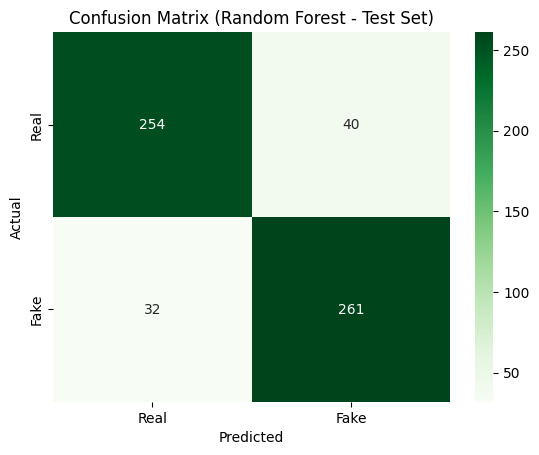

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Define Random Forest model and hyperparameter grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#  Grid search with 5-fold CV
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

#  Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

#  Train and Test Evaluation
best_rf = grid.best_estimator_

# Train
y_train_pred = best_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test
y_test_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 8. Confusion Matrix (Test Set)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Test Set)')
plt.show()


Naive Bayes


 Train Accuracy: 0.6563
 Test Accuracy : 0.6576

 Classification Report (Train):
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1172
           1       0.63      0.74      0.68      1173

    accuracy                           0.66      2345
   macro avg       0.66      0.66      0.65      2345
weighted avg       0.66      0.66      0.65      2345


 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       294
           1       0.64      0.73      0.68       293

    accuracy                           0.66       587
   macro avg       0.66      0.66      0.66       587
weighted avg       0.66      0.66      0.66       587



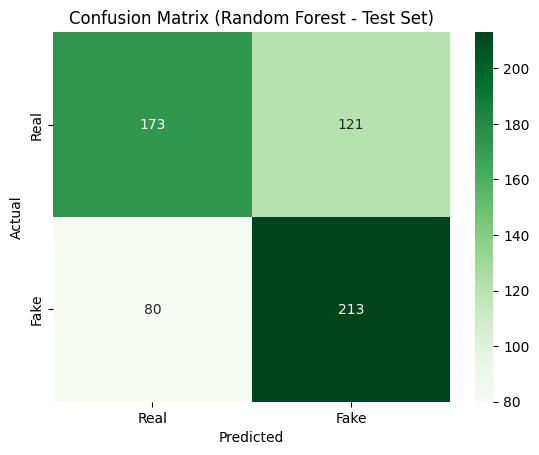

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset
df = pd.read_excel('/content/telugu_indicbert_balanced.xlsx')

#  Split into features and labels
X = df.iloc[:, :-2]  # Exclude label and comment columns
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

#  Predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

#  Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

#  Classification Reports
print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Test Set)')
plt.show()


AdaBoost Classifier

Best Parameters: {'learning_rate': 1.5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8720682302771856

 Train Accuracy: 0.9906
 Test Accuracy : 0.8637

 Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1172
           1       0.99      0.99      0.99      1173

    accuracy                           0.99      2345
   macro avg       0.99      0.99      0.99      2345
weighted avg       0.99      0.99      0.99      2345


 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       294
           1       0.85      0.88      0.87       293

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587



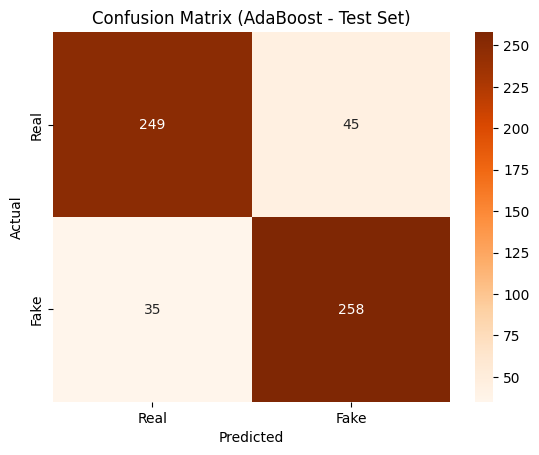

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define AdaBoost model and hyperparameter grid
ada = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

#  Grid search with 5-fold CV
grid = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

#  Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

#  Train and Test Evaluation
best_ada = grid.best_estimator_

y_train_pred = best_ada.predict(X_train)
y_test_pred = best_ada.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 8. Confusion Matrix (Test Set)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost - Test Set)')
plt.show()


DT

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7953200096494646

 Train Accuracy: 1.0000
 Test Accuracy : 0.8058

 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345


 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       294
           1       0.81      0.80      0.80       293

    accuracy                           0.81       587
   macro avg       0.81      0.81      0.81       587
weighted avg       0.81      0.81      0.81       587



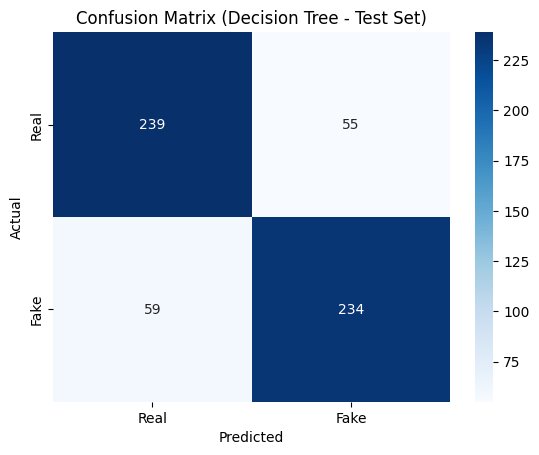

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset
df = pd.read_excel('/content/telugu_indicbert_balanced.xlsx')

#  Split into features and labels
X = df.iloc[:, :-2]  # Drop 'label' and 'comment'
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Define Decision Tree and hyperparameter grid
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search (no CV because you requested it earlier)
grid = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best params
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on train and test
best_dt = grid.best_estimator_

y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.4f}")
print(f" Test Accuracy : {test_acc:.4f}")

# 8. Classification Reports
print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree - Test Set)')
plt.show()


XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Results
 Train Accuracy: 1.0000
 Test Accuracy : 0.8893

 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       294
           1       0.88      0.91      0.89       293

    accuracy                           0.89       587
   macro avg       0.89      0.89      0.89       587
weighted avg       0.89      0.89      0.89       587


 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345



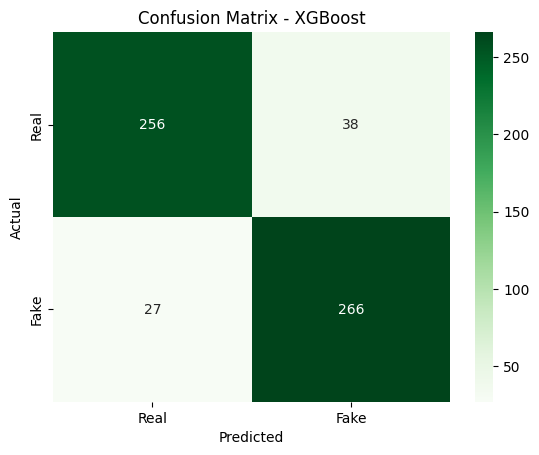

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Evaluation
print("\n XGBoost Results")
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f" Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM


 SVM Results
 Train Accuracy: 0.9420
 Test Accuracy : 0.8739

 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       294
           1       0.86      0.89      0.88       293

    accuracy                           0.87       587
   macro avg       0.87      0.87      0.87       587
weighted avg       0.87      0.87      0.87       587


 Classification Report (Train):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1172
           1       0.94      0.94      0.94      1173

    accuracy                           0.94      2345
   macro avg       0.94      0.94      0.94      2345
weighted avg       0.94      0.94      0.94      2345



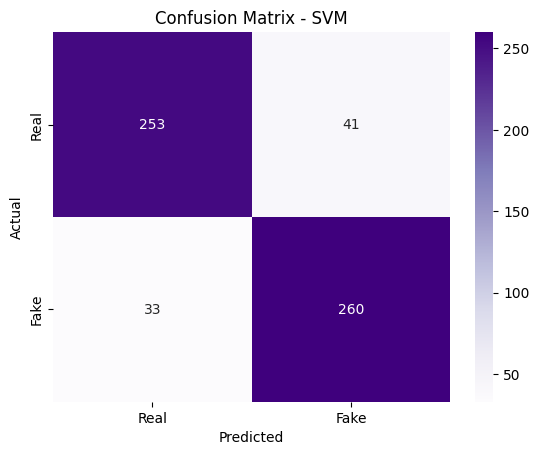

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/telugu_indicbert_balanced.xlsx')
X = df.iloc[:, :-2]
y = df['label']

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Train SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Evaluation
print("\n SVM Results")
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f" Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


LR


 Logistic Regression Results
 Train Accuracy: 0.9800
 Test Accuracy : 0.8910

 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       294
           1       0.89      0.89      0.89       293

    accuracy                           0.89       587
   macro avg       0.89      0.89      0.89       587
weighted avg       0.89      0.89      0.89       587


 Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1172
           1       0.98      0.98      0.98      1173

    accuracy                           0.98      2345
   macro avg       0.98      0.98      0.98      2345
weighted avg       0.98      0.98      0.98      2345



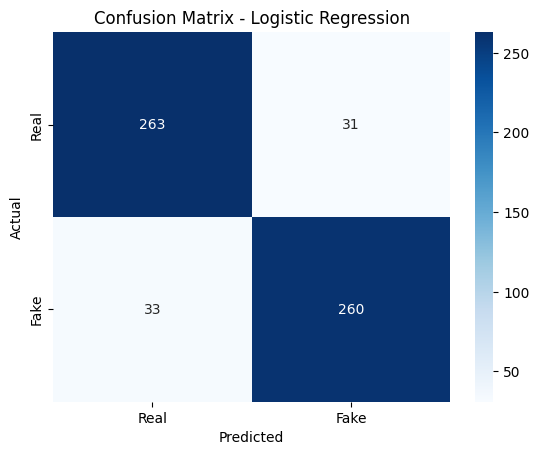

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/telugu_indicbert_balanced.xlsx')
X = df.iloc[:, :-2]
y = df['label']

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluation
print("\n Logistic Regression Results")
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f" Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



MLP


 MLP Classifier Results
 Train Accuracy: 1.0000
 Test Accuracy : 0.9029

 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       294
           1       0.89      0.92      0.90       293

    accuracy                           0.90       587
   macro avg       0.90      0.90      0.90       587
weighted avg       0.90      0.90      0.90       587



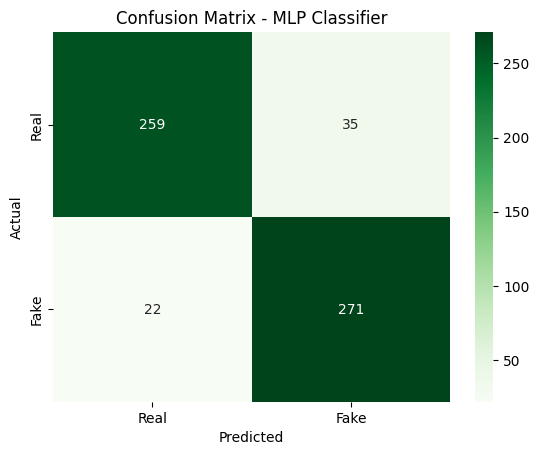

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Train MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                        max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predictions
y_train_pred = mlp_clf.predict(X_train)
y_test_pred = mlp_clf.predict(X_test)

# Evaluation
print("\n MLP Classifier Results")
print(f" Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f" Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")
print("\n Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("\n Classification Report (Train):")
print(classification_report(y_train, y_train_pred))




 Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1172
           1       1.00      1.00      1.00      1173

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345

